In [ ]:
!pip install mysql-connector-python
!pip install SQLAlchemy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

In [ ]:
import mysql.connector

In [ ]:
connection = mysql.connector.connect(host='cpanel.insaid.co',
                                    database='Capstone1',
                                    user='student',
                                    password='student')

In [ ]:
dataset_gender = pd.read_sql_query("select * from gender_age_train", con=connection)

In [ ]:
dataset_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
dataset_phone_brand = pd.read_sql_query("select * from phone_brand_device_model", con=connection)

In [ ]:
dataset_phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
#Stats about the phone brand data
dataset_phone_brand.describe()

,device_id
count,8.772600e+04
mean,-5.212557e+15
std,5.330157e+18
min,-9.223322e+18
25%,-4.623331e+18
50%,-3.109802e+16
75%,4.635194e+18
max,9.222849e+18


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
events_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/events_data.csv')


In [ ]:
events_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 738.3 MB


In [ ]:
events_data.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


In [ ]:
brand_gender_merge = pd.merge(left=dataset_phone_brand, right=dataset_gender, on='device_id', how='left')
brand_gender_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87726 entries, 0 to 87725
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     87726 non-null  int64  
 1   phone_brand   87726 non-null  object 
 2   device_model  87726 non-null  object 
 3   gender        74617 non-null  object 
 4   age           74617 non-null  float64
 5   group         74617 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ MB


In [ ]:
dataset_final = pd.merge(left=events_data, right=brand_gender_merge, on='device_id', how='left')
dataset_final.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   event_id      3252950 non-null  int64  
 1   device_id     3252497 non-null  float64
 2   timestamp     3252950 non-null  object 
 3   longitude     3252527 non-null  float64
 4   latitude      3252527 non-null  float64
 5   city          3252950 non-null  object 
 6   state         3252573 non-null  object 
 7   phone_brand   16982 non-null    object 
 8   device_model  16982 non-null    object 
 9   gender        16982 non-null    object 
 10  age           16982 non-null    float64
 11  group         16982 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 322.6+ MB


In [ ]:
dataset_final['timestamp'] = pd.to_datetime(dataset_final['timestamp'])


In [ ]:
dataset_final.head(10)

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,优米,UIMI3,M,35.0,M32-38
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,NaN,NaN,NaN,NaN,NaN
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,NaN,NaN,NaN,NaN,NaN
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,NaN,NaN,NaN,NaN,NaN
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,NaN,NaN,NaN,NaN,NaN
5,1078723,-5.124242e+17,2016-05-02 02:21:20,83.398244,17.768149,Visakhapatnam,AndhraPradesh,NaN,NaN,NaN,NaN,NaN
6,2948755,5.536513e+18,2016-05-03 16:20:14,80.359796,13.128174,Chennai,TamilNadu,NaN,NaN,NaN,NaN,NaN
7,280014,-8.879644e+18,2016-05-05 13:06:01,78.155397,16.390327,Wanparti,AndhraPradesh,NaN,NaN,NaN,NaN,NaN
8,2309828,3.020769e+18,2016-05-04 09:24:50,77.263922,28.757914,Delhi,Delhi,NaN,NaN,NaN,NaN,NaN
9,720049,4.928556e+18,2016-05-06 19:00:52,72.844795,18.974929,Mumbai,Maharashtra,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset_final.describe()

,event_id,device_id,longitude,latitude,age
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06,16982.000000
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01,32.433518
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00,9.155786
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00,10.000000
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01,26.000000
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01,30.000000
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01,36.000000
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01,79.000000


In [ ]:
dataset_final.isnull().sum()

event_id              0
device_id           453
timestamp             0
longitude           423
latitude            423
city                  0
state               377
phone_brand     3235968
device_model    3235968
gender          3235968
age             3235968
group           3235968
dtype: int64

In [ ]:
(dataset_final.isnull().sum()/dataset_final.shape[0])*100

event_id         0.000000
device_id        0.013926
timestamp        0.000000
longitude        0.013004
latitude         0.013004
city             0.000000
state            0.011589
phone_brand     99.477951
device_model    99.477951
gender          99.477951
age             99.477951
group           99.477951
dtype: float64

In [ ]:
dataset_final["gender"]=dataset_final["gender"].fillna(dataset_final["gender"].mode()[0])

In [ ]:
mean_age = dataset_final["age"].mean()


In [ ]:
mean_age

32.43351784242139

In [ ]:
rounded_mean_age = np.ceil(mean_age).astype(int)

print(rounded_mean_age)

33


In [ ]:
dataset_final["age"]=dataset_final["age"].fillna(rounded_mean_age)

In [ ]:
dataset_final["group"].unique()

array(['M32-38', nan, 'F33-42', 'M22-', 'M29-31', 'F29-32', 'F23-',
       'M23-26', 'F24-26', 'M39+', 'F43+', 'F27-28', 'M27-28'],
      dtype=object)

In [ ]:
dataset_final["group"]=dataset_final["group"].replace('M22-','M22-28')

In [ ]:
dataset_final["group"]=dataset_final["group"].replace('F23-','F23-28')

In [ ]:
dataset_final["age"].min()

10.0

In [ ]:
def grp(x):
    if x['gender'] == 'M' and x['age'] < 22:
        return "M10-21"
    elif x['gender'] == 'F' and x['age']< 22 :
        return "F10-21"
    elif x['gender'] == 'M' and 32<= x['age'] <=38:
        return "M32-38"
    elif x['gender'] == 'F' and 32<= x['age'] <=38:
        return "F32-38"
    else:
        return x['group']
dataset_final['group'] = dataset_final.apply(grp, axis=1)

In [ ]:
dataset_final['group'].head()

0    M32-38
1    M32-38
2    M32-38
3    M32-38
4    M32-38
Name: group, dtype: object

In [ ]:
dataset_final.columns

Index(['event_id', 'device_id', 'timestamp', 'longitude', 'latitude', 'city',
       'state', 'phone_brand', 'device_model', 'gender', 'age', 'group'],
      dtype='object')

In [ ]:
# Assuming 'dataset_final' is your DataFrame
most_frequent_model = dataset_final['device_model'].mode()[0]
dataset_final['device_model'] = dataset_final['device_model'].fillna(most_frequent_model)


In [ ]:
dataset_final.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,优米,UIMI3,M,35.0,M32-38
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,NaN,红米,M,33.0,M32-38
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,NaN,红米,M,33.0,M32-38
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,NaN,红米,M,33.0,M32-38
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,NaN,红米,M,33.0,M32-38


In [ ]:
selected_states = ['TamilNadu', 'Manipur', 'Chandigarh', 'Tripura', 'UttarPradesh', 'ArunachalPradesh']
events_new = dataset_final[dataset_final['state'].isin(selected_states)]

In [ ]:
events_new['state'] = events_new.groupby('city')['state'].fillna(method='ffill')


In [ ]:
events_new.info(null_counts=True,memory_usage="All")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534415 entries, 3 to 3252949
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      534415 non-null  int64         
 1   device_id     534352 non-null  float64       
 2   timestamp     534415 non-null  datetime64[ns]
 3   longitude     534352 non-null  float64       
 4   latitude      534352 non-null  float64       
 5   city          534415 non-null  object        
 6   state         534415 non-null  object        
 7   phone_brand   3176 non-null    object        
 8   device_model  534415 non-null  object        
 9   gender        534415 non-null  object        
 10  age           534415 non-null  float64       
 11  group         534415 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 53.0+ MB


In [ ]:
(events_new.isnull().sum()/events_new.shape[0])*100

event_id         0.000000
device_id        0.011789
timestamp        0.000000
longitude        0.011789
latitude         0.011789
city             0.000000
state            0.000000
phone_brand     99.405705
device_model     0.000000
gender           0.000000
age              0.000000
group            0.000000
dtype: float64

In [ ]:
events_new['phone_brand'].unique()

array([nan, '三星', '小米', '华为', '魅族', 'OPPO', 'HTC', '波导', '酷派', 'vivo',
       'LG', '朵唯'], dtype=object)

In [ ]:
chinese_to_english_mapping = {
    '三星': 'Samsung',
    '小米': 'Xiaomi',
    '华为': 'Huawei',
    '魅族': 'Meizu',
    'OPPO': 'OPPO',
    'HTC': 'HTC',
     '波导': 'Waveguide',
    '酷派' :'Coolpad',
    'vivo': 'Vivo',
    'LG': 'LG',
    '朵唯':'Duo Wei'
}


In [ ]:
events_new['Mapped_Brand'] = events_new['phone_brand'].map(chinese_to_english_mapping).fillna(events_new['phone_brand'])

In [ ]:
events_new['device_model'].unique()

array(['红米', 'K860i', 'E3', 'Mate 8', '魅蓝Note 2', 'Galaxy Note 2', 'R3',
       'Galaxy S4', 'R811', 'Desire HD', 'R7', 'G7 Plus', 'Ascend P6',
       'S60t', 'A788t', 'L9', 'Galaxy S4 Zoom', 'Ascend G7', '荣耀畅玩4',
       'Galaxy S3', 'Find 7', 'B199', '大神F1', 'Y23L', '乐檬K3', 'R831S',
       '荣耀畅玩4X', 'G610T', 'MI 3', 'Y27', '红米2A', '红米note', 'Galaxy Win',
       'U707T', 'R7 Plus', 'MX3', 'Galaxy Note 3', 'Nexus 5', '荣耀3C畅玩版',
       'T328t', 'MI One Plus', 'Galaxy Note', 'D350', 'MI 2S',
       'Galaxy S5', '荣耀6', 'F2', 'A320t', 'Galaxy Note Edge', '荣耀3C',
       'X5L', 'A880', 'MI 2'], dtype=object)

In [ ]:
chinese_to_english_mapping = {
    '红米': 'Redmi',
    'K860i': 'K860i',
    'E3': 'E3',
    'Mate 8': 'Mate 8',
    '魅蓝Note 2': 'Meilan Note 2',
    'Galaxy Note 2': 'Galaxy Note 2',
    'R3': 'R3',
    'Galaxy S4': 'Galaxy S4',
    'R811': 'R811',
    'Desire HD': 'Desire HD',
    'R7': 'R7',
    'G7 Plus': 'G7 Plus',
    'Ascend P6': 'Ascend P6',
    'S60t': 'S60t',
    'A788t': 'A788t',
    'L9': 'L9',
    'Galaxy S4 Zoom': 'Galaxy S4 Zoom',
    'Ascend G7': 'Ascend G7',
    '荣耀畅玩4': 'Honor Play 4',
    'Galaxy S3': 'Galaxy S3',
    'Find 7': 'Find 7',
    'B199': 'B199',
    '大神F1': 'Das F1',
    'Y23L': 'Y23L',
    '乐檬K3': 'Lemon K3',
    'R831S': 'R831S',
    '荣耀畅玩4X': 'Honor Play 4X',
    'G610T': 'G610T',
    'MI 3': 'MI 3',
    'Y27': 'Y27',
    '红米2A': 'Redmi 2A',
    '红米note': 'Redmi Note',
    'Galaxy Win': 'Galaxy Win',
    'U707T': 'U707T',
    'R7 Plus': 'R7 Plus',
    'MX3': 'MX3',
    'Galaxy Note 3': 'Galaxy Note 3',
    'Nexus 5': 'Nexus 5',
    '荣耀3C畅玩版': 'Honor 3C Play Edition',
    'T328t': 'T328t',
    'MI One Plus': 'MI One Plus',
    'Galaxy Note': 'Galaxy Note',
    'D350': 'D350',
    'MI 2S': 'MI 2S',
    'Galaxy S5': 'Galaxy S5',
    '荣耀6': 'Honor 6',
    'F2': 'F2',
    'A320t': 'A320t',
    'Galaxy Note Edge': 'Galaxy Note Edge',
    '荣耀3C': 'Honor 3C',
    'X5L': 'X5L',
    'A880': 'A880',
    'MI 2': 'MI 2'
}

In [ ]:
events_new['Mapped_device_Brand'] = events_new['device_model'].map(chinese_to_english_mapping).fillna(events_new['device_model'])

In [ ]:
events_new.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group,Mapped_Brand,Mapped_device_Brand
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,NaN,红米,M,33.0,M32-38,NaN,Redmi
6,2948755,5.536513e+18,2016-05-03 16:20:14,80.359796,13.128174,Chennai,TamilNadu,NaN,红米,M,33.0,M32-38,NaN,Redmi
10,3219828,-3.433061e+18,2016-05-03 00:27:21,80.290779,13.115427,Chennai,TamilNadu,NaN,红米,M,33.0,M32-38,NaN,Redmi
14,460645,7.983871e+18,2016-05-04 21:04:40,80.335435,13.189053,Chennai,TamilNadu,NaN,红米,M,33.0,M32-38,NaN,Redmi
15,998037,7.594216e+18,2016-05-03 20:59:09,80.306871,13.172970,Chennai,TamilNadu,NaN,红米,M,33.0,M32-38,NaN,Redmi


In [ ]:
events_new.drop(["phone_brand","device_model"],axis=1,inplace=True)

In [ ]:
mobile_to_phone_mapping = {
    'Redmi':['Redmi 2A', 'Redmi Note','Redmi'],
    'Lenovo':['K860i', 'A788t','Lemon K3', 'A320t','A880','Lenovo'],
    'HTC':['E3', 'T328t','HTC','Desire HD'],
    'Huawei':['Mate 8','Ascend P6','Ascend G7','B199','G610T','Huawei'],
    'Miezu':['Meilan Note 2', 'MX3','Miezu'],
    'Samsung':['Galaxy Note 2','Galaxy S4','Galaxy S4 Zoom','Galaxy S3','Galaxy Win','Galaxy Note 3','Galaxy Note','Galaxy S5','Galaxy Note Edge','S60t','Samsung'],
    'Sharp Aquos ':['R3','Sharp Aquos'],
    'Oppo':['R811','R7', 'Find 7','R831S', 'U707T', 'R7 Plus','Oppo'],
    'Motorola':['G7 Plus','Motorola'],
    'LG':['L9','Nexus 5','LG'],
    'Honor':['Honor Play 4','Honor Play 4X','Honor 3C Play Edition','Honor 6','Honor 3C','Honor'],
    'Vivo':['Y23L','Y27','X5L','Vivo'],
    'Xiaomi': ['MI 3','MI One Plus','MI 2S','MI 2','F2','Xiaomi'],
    'Duo Wei':['D350','Duo Wei'],
    'Coolpad':['Das F1','Coolpad'],
    'Waveguide': ['Waveguide','Waveguide']
}

In [ ]:
# Iterate over the DataFrame rows
for index, row in events_new.iterrows():
    Mapped_device_Brand = row['Mapped_device_Brand']
    Mapped_Brand = np.nan

    # Check if the device_model exists in the dictionary
    for brand, models in mobile_to_phone_mapping.items():
        if Mapped_device_Brand in models:
            Mapped_Brand = brand
            break

    # Update the 'Phone_Brand' value in the DataFrame
    events_new.at[index, 'Mapped_Brand'] = Mapped_Brand




In [ ]:
events_new['Mapped_Brand'].unique()

array(['Redmi', 'Lenovo', 'HTC', 'Huawei', 'Miezu', 'Samsung',
       'Sharp Aquos ', 'Oppo', 'Motorola', 'LG', 'Honor', 'Coolpad',
       'Vivo', 'Xiaomi', 'Duo Wei'], dtype=object)

In [ ]:
(events_new.isnull().sum()/events_new.shape[0])*100

event_id               0.000000
device_id              0.011789
timestamp              0.000000
longitude              0.011789
latitude               0.011789
city                   0.000000
state                  0.000000
gender                 0.000000
age                    0.000000
group                  0.000000
Mapped_Brand           0.000000
Mapped_device_Brand    0.000000
dtype: float64

In [ ]:
z_scores_latitude = np.abs((events_new['latitude'] - events_new['latitude'].mean()) / events_new['latitude'].std())
z_scores_longitude = np.abs((events_new['longitude'] - events_new['longitude'].mean()) / events_new['longitude'].std())

# Set a z-score threshold for identifying outliers
z_score_threshold = 2

# Identify latitude outliers based on z-scores
latitude_outliers = events_new[z_scores_latitude > z_score_threshold]

# Replace latitude outliers with NaN
events_new.loc[latitude_outliers.index, 'latitude'] = pd.NA

# Identify longitude outliers based on z-scores
longitude_outliers = events_new[z_scores_longitude > z_score_threshold]

# Replace longitude outliers with NaN
events_new.loc[longitude_outliers.index, 'longitude'] = pd.NA


In [ ]:
(events_new.isnull().sum()/events_new.shape[0])*100

event_id                0.000000
device_id               0.011789
timestamp               0.000000
longitude               4.133305
latitude               11.429881
city                    0.000000
state                   0.000000
gender                  0.000000
age                     0.000000
group                   0.000000
Mapped_Brand            0.000000
Mapped_device_Brand     0.000000
dtype: float64

In [ ]:

from sklearn.impute import SimpleImputer

# Assuming 'events_new' is your DataFrame containing the data
# Select the columns that need imputation
columns_to_impute = ['latitude', 'longitude', 'device_id', 'event_id']

# Initialize the SimpleImputer with strategy 'mean' to impute numerical columns
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the selected columns
events_new[columns_to_impute] = imputer.fit_transform(events_new[columns_to_impute])


In [ ]:
events_new.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,Mapped_Brand,Mapped_device_Brand
3,448114.0,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,33.0,M32-38,Redmi,Redmi
6,2948755.0,5.536513e+18,2016-05-03 16:20:14,80.359796,13.128174,Chennai,TamilNadu,M,33.0,M32-38,Redmi,Redmi
10,3219828.0,-3.433061e+18,2016-05-03 00:27:21,80.290779,13.115427,Chennai,TamilNadu,M,33.0,M32-38,Redmi,Redmi
14,460645.0,7.983871e+18,2016-05-04 21:04:40,80.335435,13.189053,Chennai,TamilNadu,M,33.0,M32-38,Redmi,Redmi
15,998037.0,7.594216e+18,2016-05-03 20:59:09,80.306871,13.172970,Chennai,TamilNadu,M,33.0,M32-38,Redmi,Redmi


In [ ]:
(events_new.isnull().sum()/events_new.shape[0])*100

event_id               0.0
device_id              0.0
timestamp              0.0
longitude              0.0
latitude               0.0
city                   0.0
state                  0.0
gender                 0.0
age                    0.0
group                  0.0
Mapped_Brand           0.0
Mapped_device_Brand    0.0
dtype: float64

In [ ]:
count1 = events_new.groupby(['latitude', 'longitude']).size()
count = pd.DataFrame(count1)
count = count.rename(columns={0: 'DuplicateCounts'})
events_new = pd.merge(left=events_new, right=count, on=['latitude', 'longitude'], how='left')


In [ ]:
events_new.duplicated().sum()

0

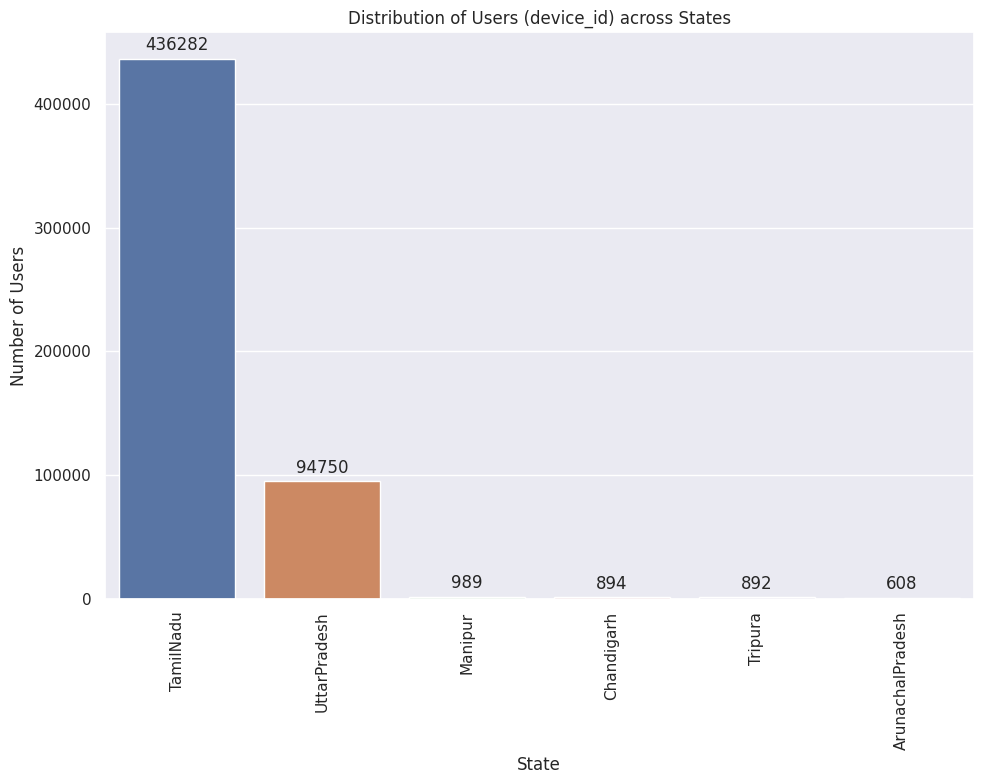

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'events_new' is your DataFrame with columns 'state' and 'device_id'

# Create a countplot to visualize the distribution of users across states
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
ax=sns.countplot(data=events_new, x='state', order=events_new['state'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Users')
plt.title('Distribution of Users (device_id) across States')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


**Observation** -According to the above graph, it has been observed that **Tamil Nadu (Chennai)** has the **highest number** i.e **436282** of users across other states (UP, Manipur, Chandigarh, Tripura, Arunachal Pradesh)

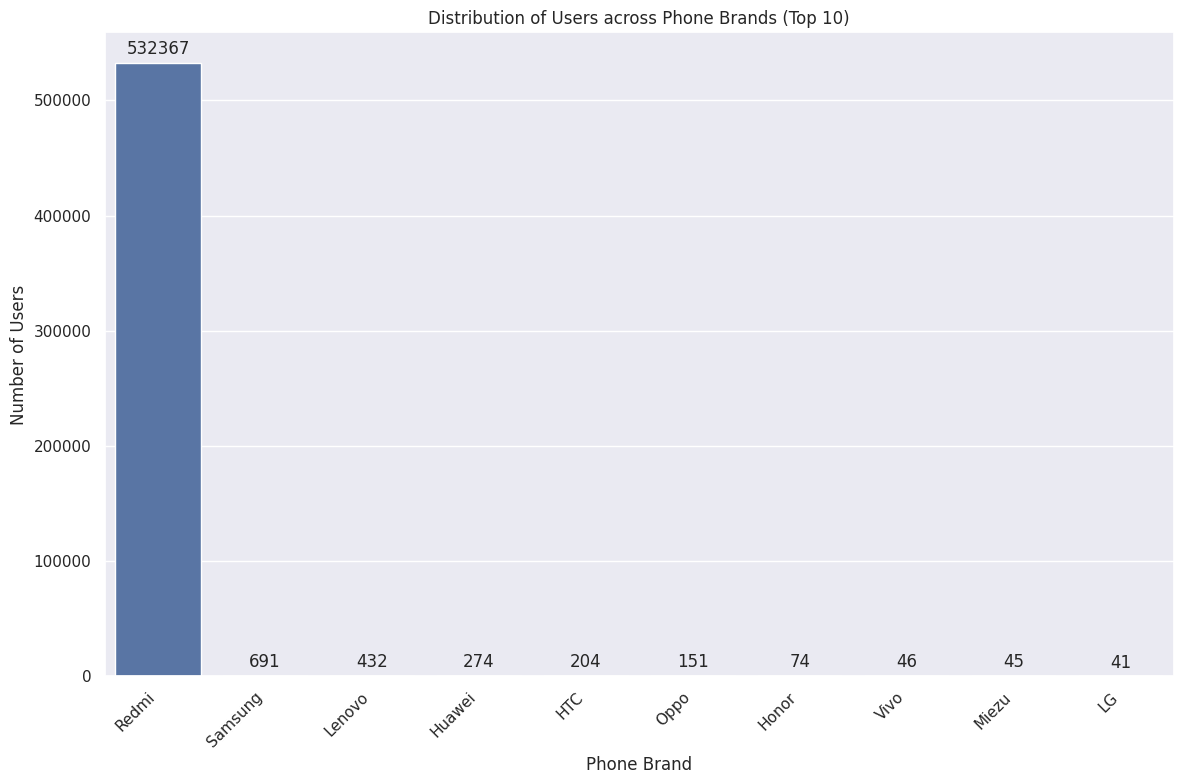

In [ ]:


# Assuming 'events_new' is your DataFrame with a column named 'Mapped_Brand' that contains the phone brand names

# Get the 10 most used phone brands
top_10_brands = events_new['Mapped_Brand'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
df_top_10_brands = events_new[events_new['Mapped_Brand'].isin(top_10_brands)]

# Create a countplot to visualize the distribution of users across phone brands
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=df_top_10_brands, x='Mapped_Brand', order=top_10_brands)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Phone Brand')
plt.ylabel('Number of Users')
plt.title('Distribution of Users across Phone Brands (Top 10)')
plt.tight_layout()
plt.show()


**Observation**- It has been observed that amongst the  **top 10 phone brands** , Redmi is leading the market, i.e.**Redmi** is dominating with above **5 million** number of users.

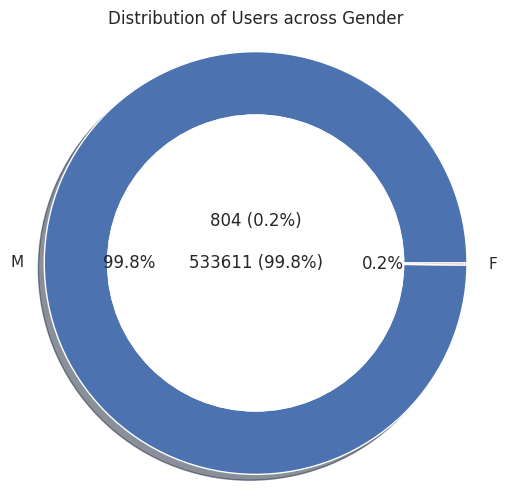

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'events_new' is your DataFrame with the 'gender' column

# Calculate the counts and percentages for each gender category
gender_counts = events_new['gender'].value_counts()
total_users = len(events_new)
gender_percentages = gender_counts / total_users * 100

# Create a donut plot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',shadow=True, wedgeprops=dict(width=0.3, edgecolor='w'))

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add percentage annotations
for i, (count, percent) in enumerate(zip(gender_counts, gender_percentages)):
    plt.text(0, 0.2*i, f"{count} ({percent:.1f}%)", ha='center', va='center', fontsize=12)

plt.title('Distribution of Users across Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


**Observation** -: The above donut graph shows the distribution of users across gender. This graph reveals that **maximum users are males** with a percentage of **99.8%** in comparison to **female users who are 0.2%**.

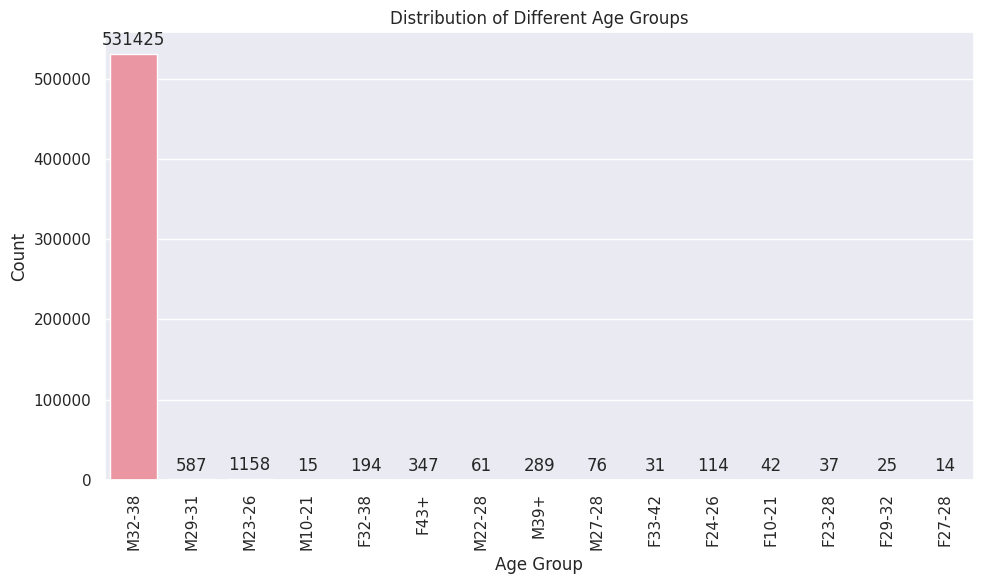

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=events_new, x='group')
plt.xticks(rotation=90)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Different Age Groups')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

**Observation** -:  We have observed from the graph that the age group which is having a **maximum count** is **M 32-38**. I mean that **male users** within the age **group of 32-38 are maximum in number**. There are very less number of female user apart from that **most belong** to **43+ age** group.

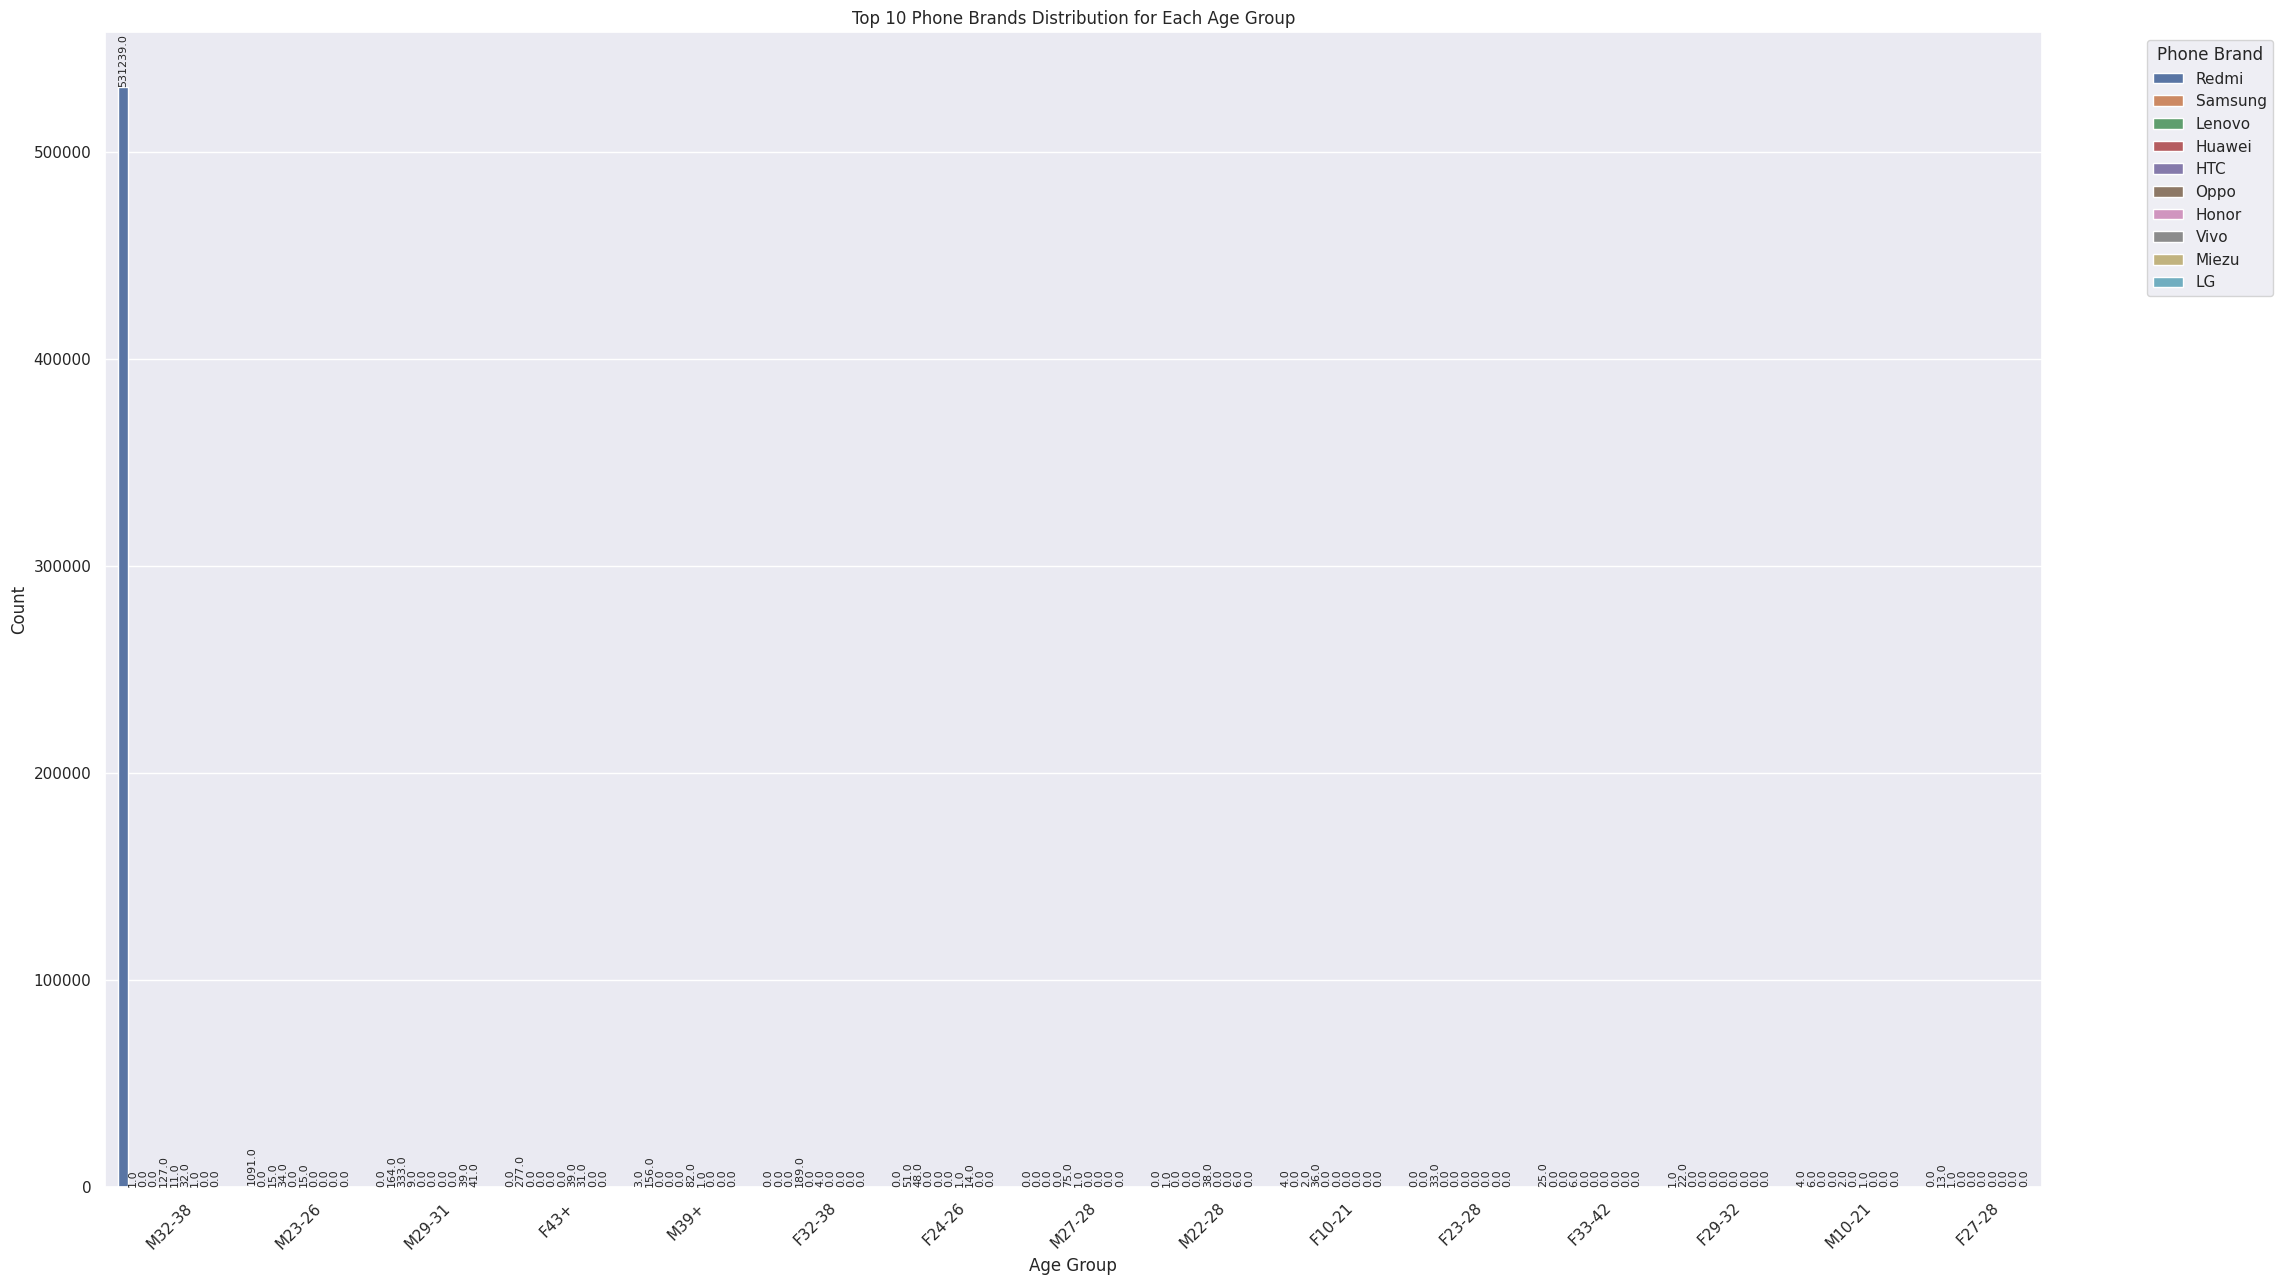

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'events_new' is your DataFrame with the 'group' and 'Mapped_Brand' columns

# Get the top 10 phone brands
top_10_brands = events_new['Mapped_Brand'].value_counts().iloc[:10].index

# Create the count plot with appropriate order for age groups and phone brands
plt.figure(figsize=(25, 15))
ax = sns.countplot(x='group', hue='Mapped_Brand', hue_order=top_10_brands,
                   order=events_new['group'].value_counts().index,
                   data=events_new)

plt.title('Top 10 Phone Brands Distribution for Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Phone Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Add bar values vertically on top of each bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=8, rotation=90)

plt.show()


**Observation** :- On looking at the bar, it can be easily predicted that the most **liked** brand is **Redmi** amongst the males of **age between 32 and 38**.

In [ ]:
events_new.columns

Index(['event_id', 'device_id', 'timestamp', 'longitude', 'latitude', 'city',
       'state', 'gender', 'age', 'group', 'Mapped_Brand',
       'Mapped_device_Brand', 'DuplicateCounts'],
      dtype='object')

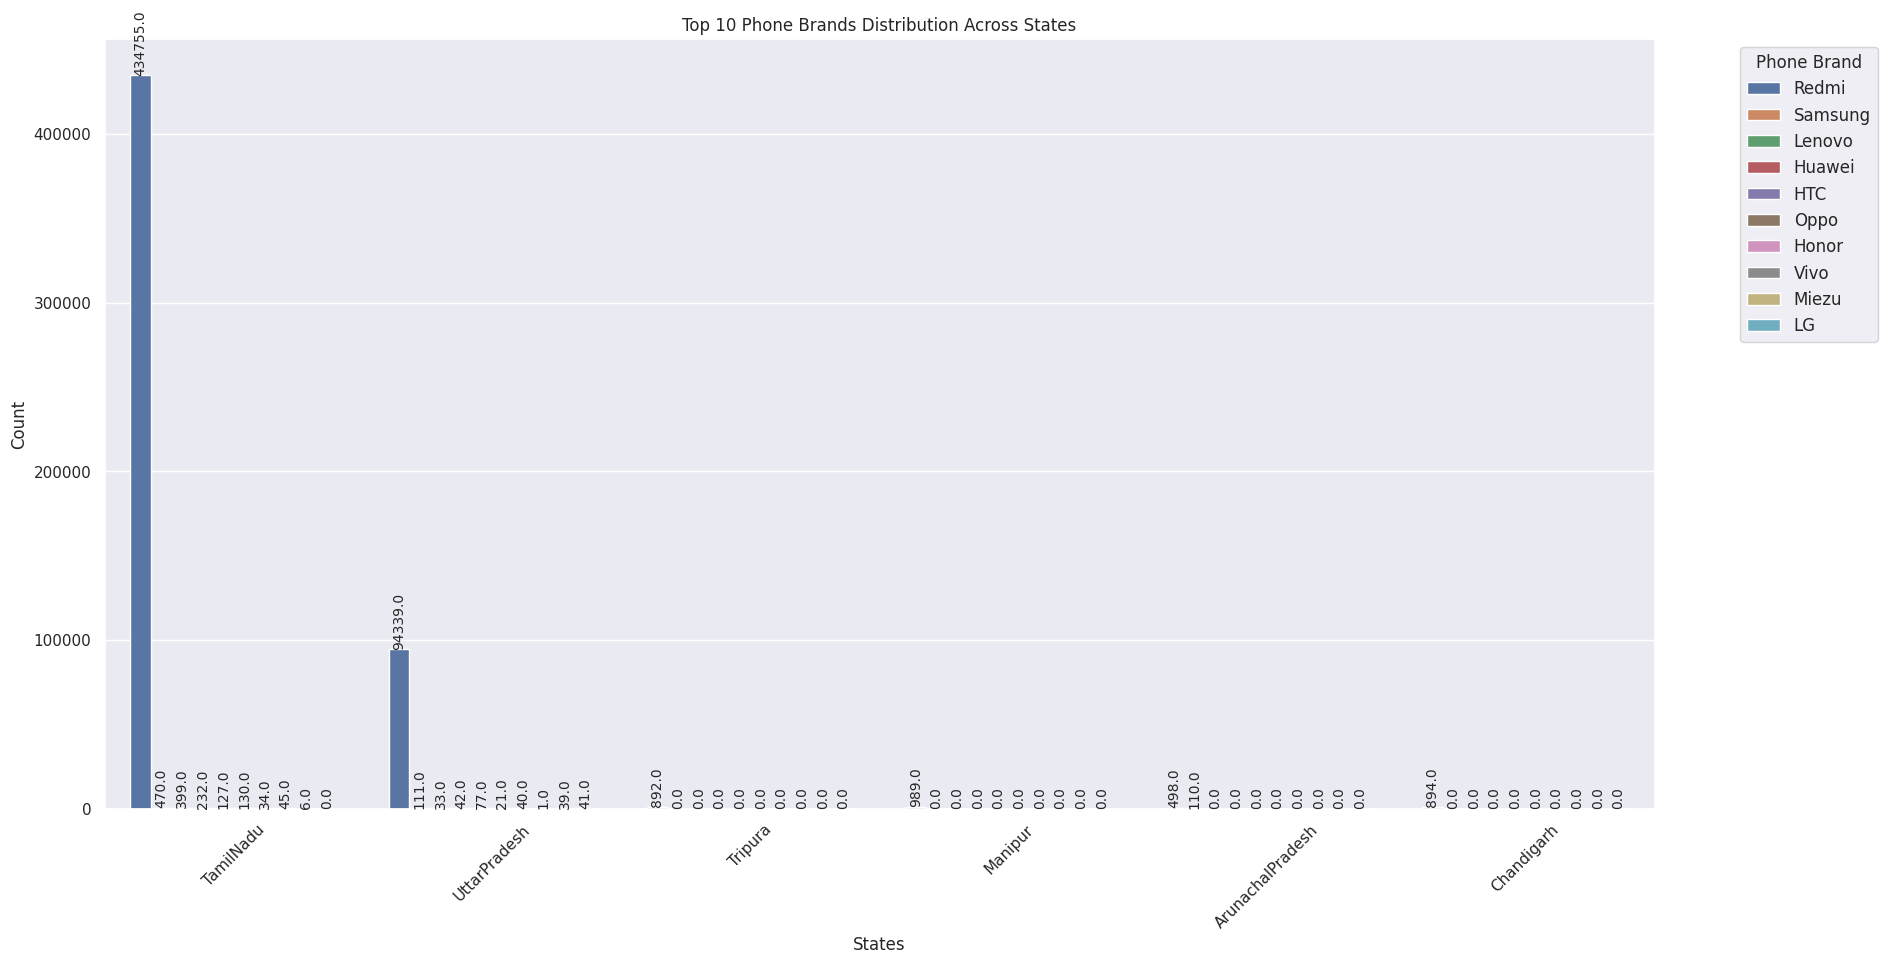

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'events_new' is your DataFrame with the 'city' and 'Mapped_Brand' columns

# Get the top 10 phone brands
top_10_brands = events_new['Mapped_Brand'].value_counts().iloc[:10].index

# Create the count plot with all cities and phone brands
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='state', hue='Mapped_Brand', hue_order=top_10_brands,
                   data=events_new)

plt.title('Top 10 Phone Brands Distribution Across States')
plt.xlabel('States')
plt.ylabel('Count')
plt.legend(title='Phone Brand', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12})
plt.xticks(rotation=45)

# Add bar values vertically on top of each bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', fontsize=10, rotation=90)

plt.show()


**Observation** :-The above graph suggests that across all the cities, **Tamil Nadu** has secured the **highest rank** in the number of users and **2nd highest** is achieved by **Uttar Pradesh**

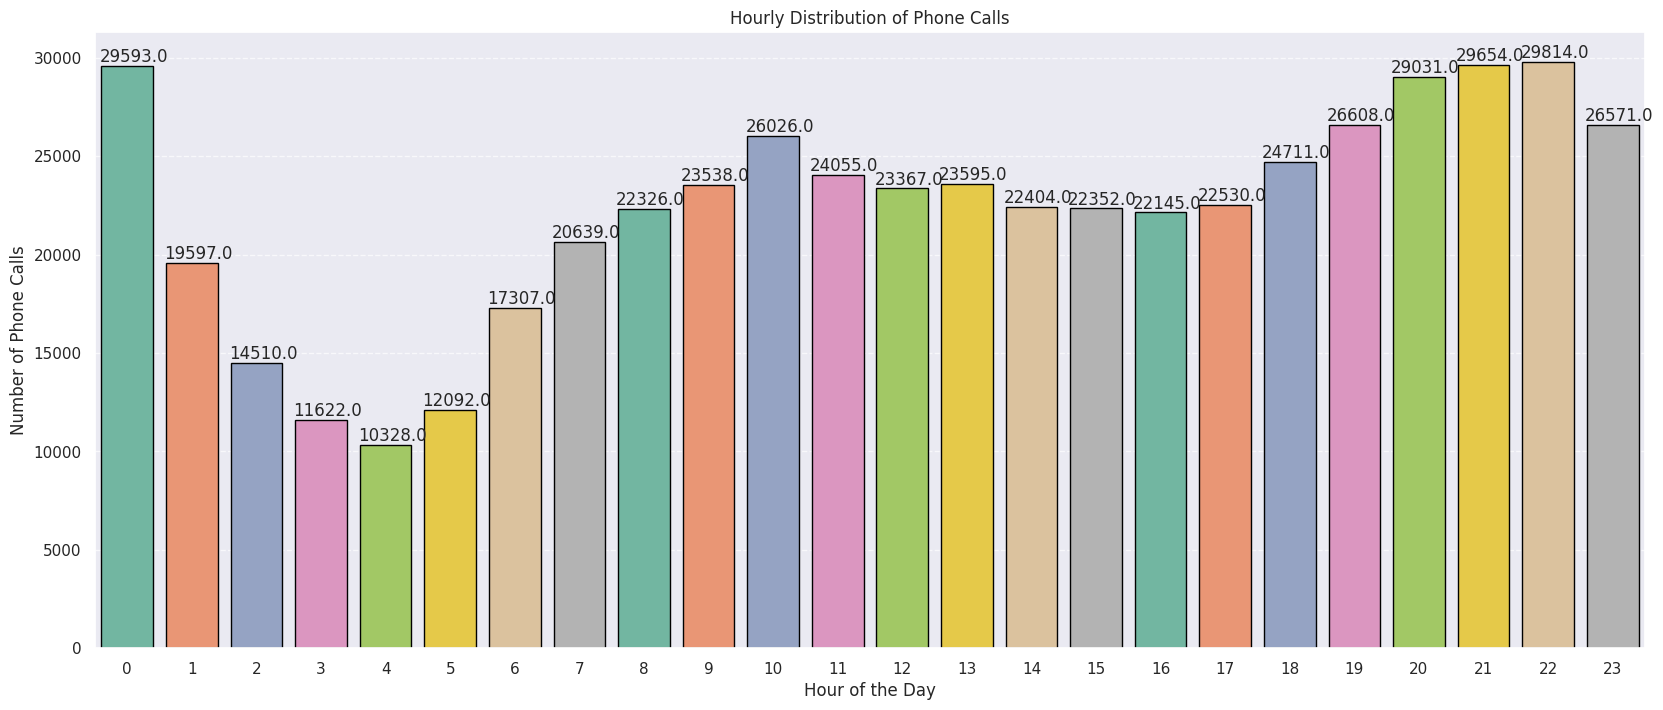

In [ ]:


# Assuming 'events_new' is your DataFrame with the 'time' column

# Convert the 'time' column to pandas datetime type if it's not already in datetime format
events_new['timestamp'] = pd.to_datetime(events_new['timestamp'])

# Extract the hour from the 'time' column and create a new column 'hour'
events_new['hour'] = events_new['timestamp'].dt.hour

# Plot the hourly distribution of phone calls
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='hour', data=events_new, palette='Set2', edgecolor='black')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Phone Calls')
plt.title('Hourly Distribution of Phone Calls')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar values on top of each bar
for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + 0.5, y + height), ha='center', va='bottom')

plt.show()


**The Hourly distribution of phone calls shown in the above graph. It has certain observations:**





*   The calls are done **mostly** in  night, i.e. from **8 PM to 12 AM**
*   The  **least** number of calls are made during the **early morning time, i.e. 3 AM to 5AM**

*   There is a **little bump** in the number of calls made in the **morning, i.e. 10 AM.**




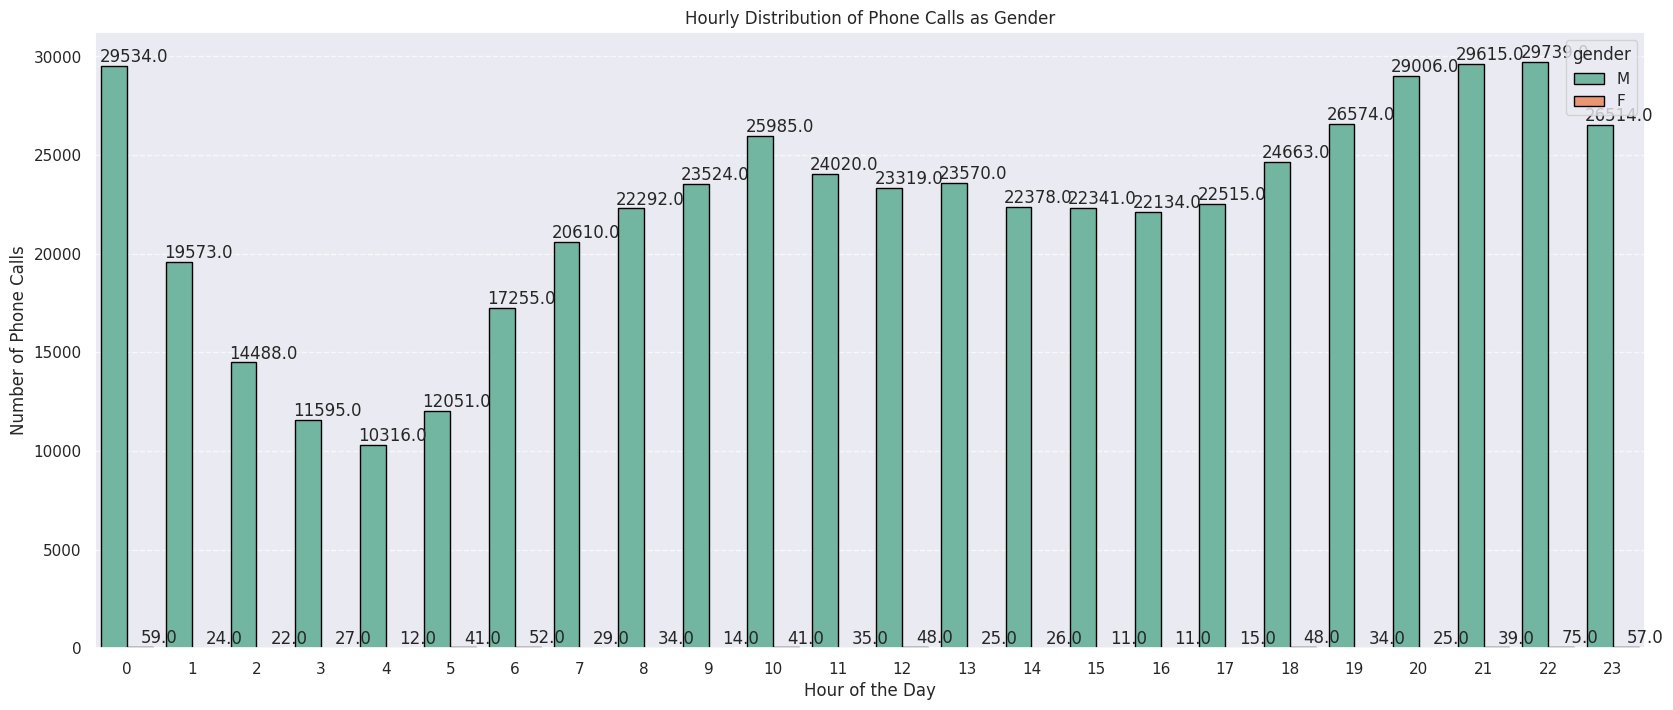

In [ ]:


# Assuming 'events_new' is your DataFrame with the 'time' column

# Convert the 'time' column to pandas datetime type if it's not already in datetime format
events_new['timestamp'] = pd.to_datetime(events_new['timestamp'])

# Extract the hour from the 'time' column and create a new column 'hour'
events_new['hour'] = events_new['timestamp'].dt.hour

# Plot the hourly distribution of phone calls
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='hour',hue="gender", data=events_new, palette='Set2', edgecolor='black')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Phone Calls')
plt.title('Hourly Distribution of Phone Calls as Gender')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar values on top of each bar
for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + 0.5, y + height), ha='center', va='bottom')

plt.show()


**Observation**:-The Hourly distribution of phone calls amongst the male and female users is shown in the above graph. This graph suggests that the maximum phone calls are made by users in the time duration of **8 PM to 12 AM** and the least number of calls are made in early morning hours i.e. **3 AM to 5 AM**. Whereas the **least number of calls are made by female users.**

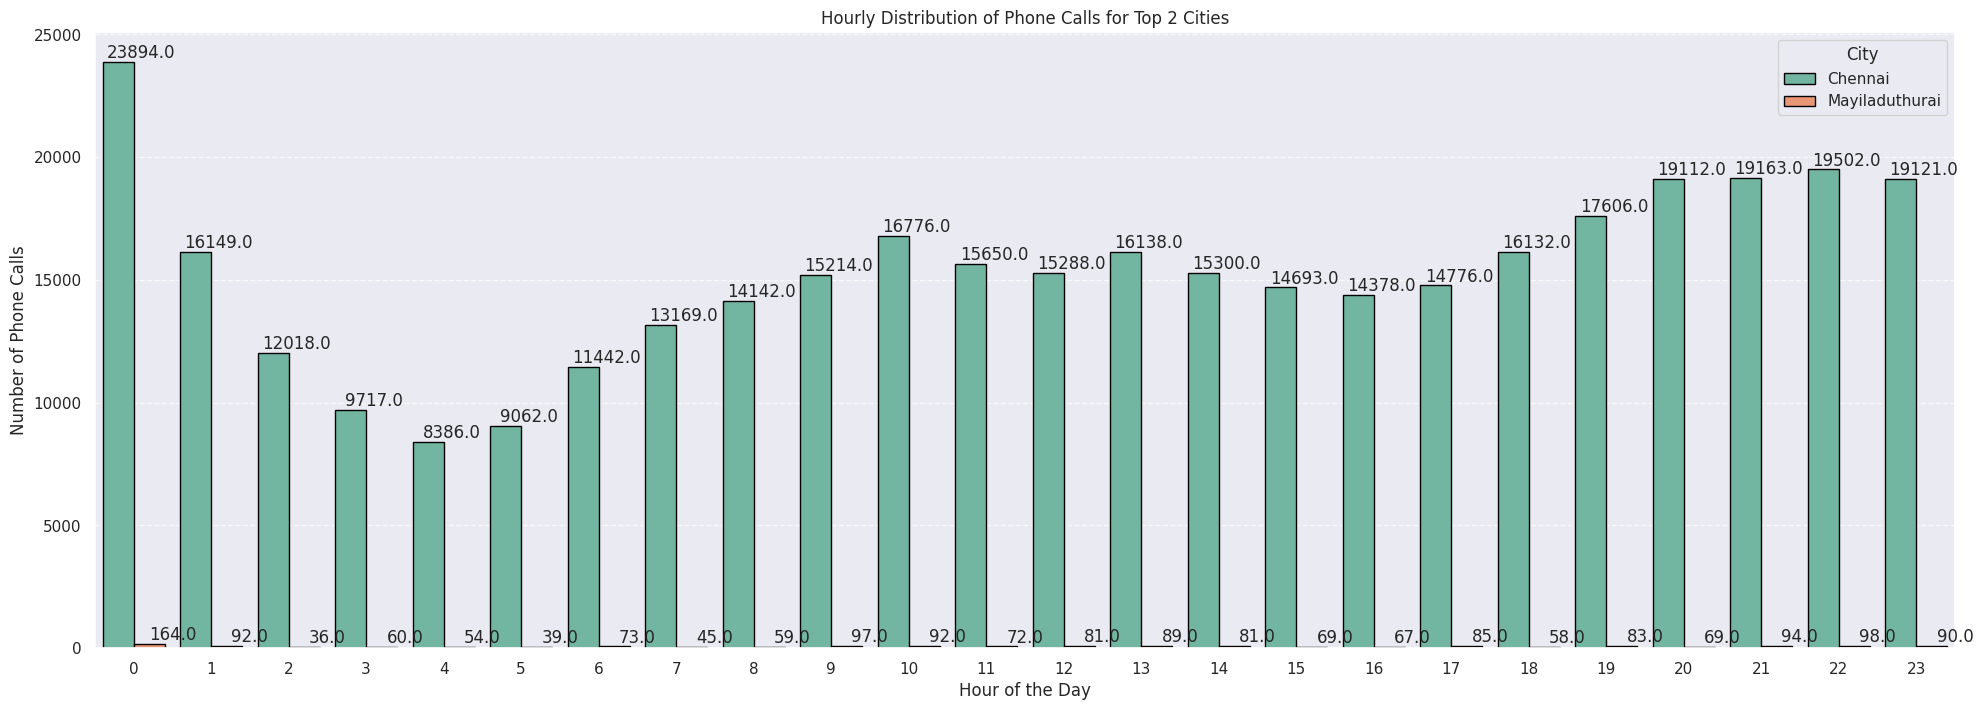

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'events_new' is your DataFrame with the 'time' and 'city' columns

# Convert the 'time' column to pandas datetime type if it's not already in datetime format
events_new['timestamp'] = pd.to_datetime(events_new['timestamp'])

# Extract the hour from the 'time' column and create a new column 'hour'
events_new['hour'] = events_new['timestamp'].dt.hour

# Get the top 2 cities based on the number of phone calls
top_cities = events_new['city'].value_counts().nlargest(2).index

# Filter the data for the top 2 cities
events_top_cities = events_new[events_new['city'].isin(top_cities)]

# Plot the hourly distribution of phone calls for the top 2 cities
plt.figure(figsize=(24, 8))
ax = sns.countplot(x='hour', data=events_top_cities, hue='city', palette='Set2', edgecolor='black')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Phone Calls')
plt.title('Hourly Distribution of Phone Calls for Top 2 Cities')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar values on top of each bar and hue group (city)
for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + 0.5, y + height), ha='center', va='bottom')

plt.legend(title='City', loc='upper right')
plt.show()


**Observation** :- The Hourly distribution of phone calls amongst the top two cities shows that **Chennai** has the **highest number** of phone calls made throughout the day, whereas the **2nd number** is achieved by **Mayiladuthurai**.

In [ ]:

!pip install geopandas matplotlib

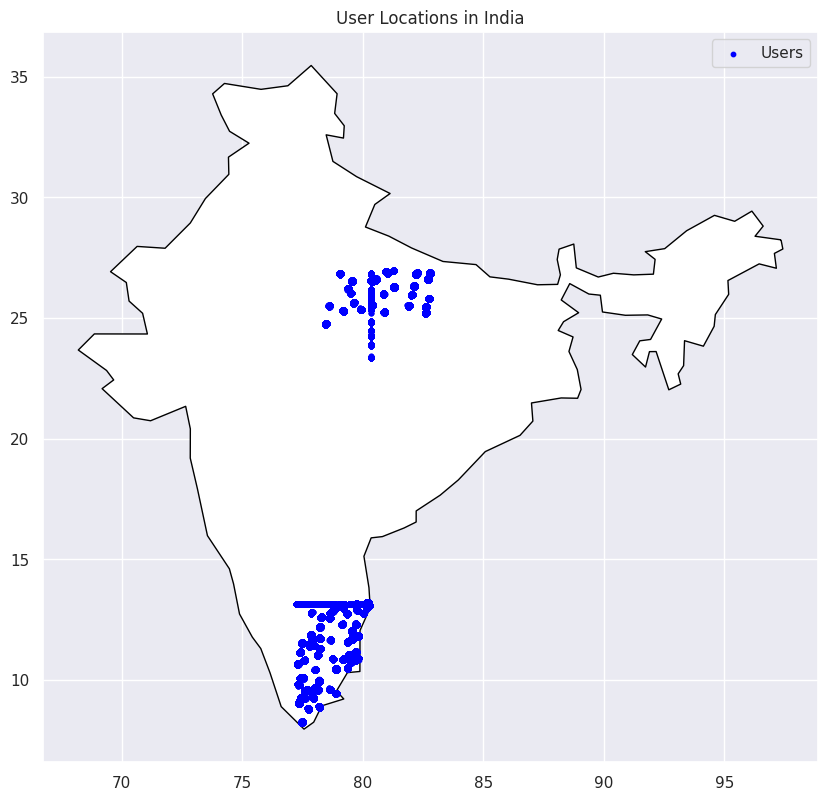

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world boundaries GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world boundaries to get India
india = world[world.name == 'India']

# Create a GeoDataFrame from your events_new DataFrame
gdf = gpd.GeoDataFrame(events_new, geometry=gpd.points_from_xy(events_new.longitude, events_new.latitude))

# Plot the world map
ax = india.plot(figsize=(10, 10), color='white', edgecolor='black')

# Plot the user locations within India
gdf[gdf.within(india.geometry.iloc[0])].plot(ax=ax, markersize=10, color='blue', marker='o', label='Users')

# Set plot title and legend
plt.title('User Locations in India')
plt.legend()

# Show the plot
plt.show()
